# Load Libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data


In [64]:
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


# Data Cleaning


## Handling missing values
We can check for null values using .isnull() and fill them in using .fillna()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [66]:
df.isnull().sum().sum()


0

## Removing duplicates
We can use .drop_duplicates()

In [67]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
882    False
883    False
884    False
885    False
886    False
Length: 887, dtype: bool

## Quick View for the the data
We can use .describe() and .info()

In [68]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


## Converting data types
Using .astype()

In [69]:
# no need Converting data types

## Check for outliers
You can use box plots, histograms, and z-scores to find outliers.

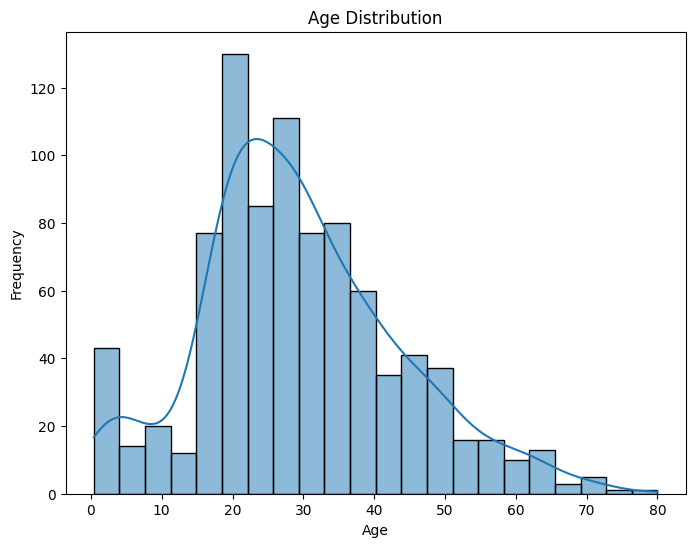

In [70]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

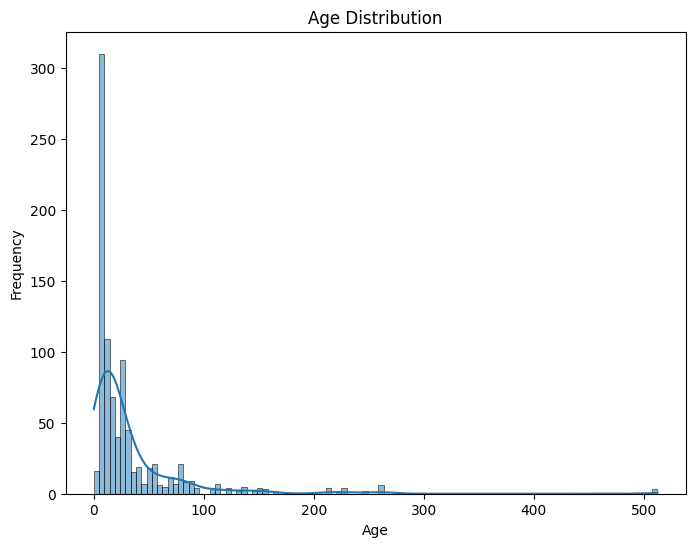

In [71]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

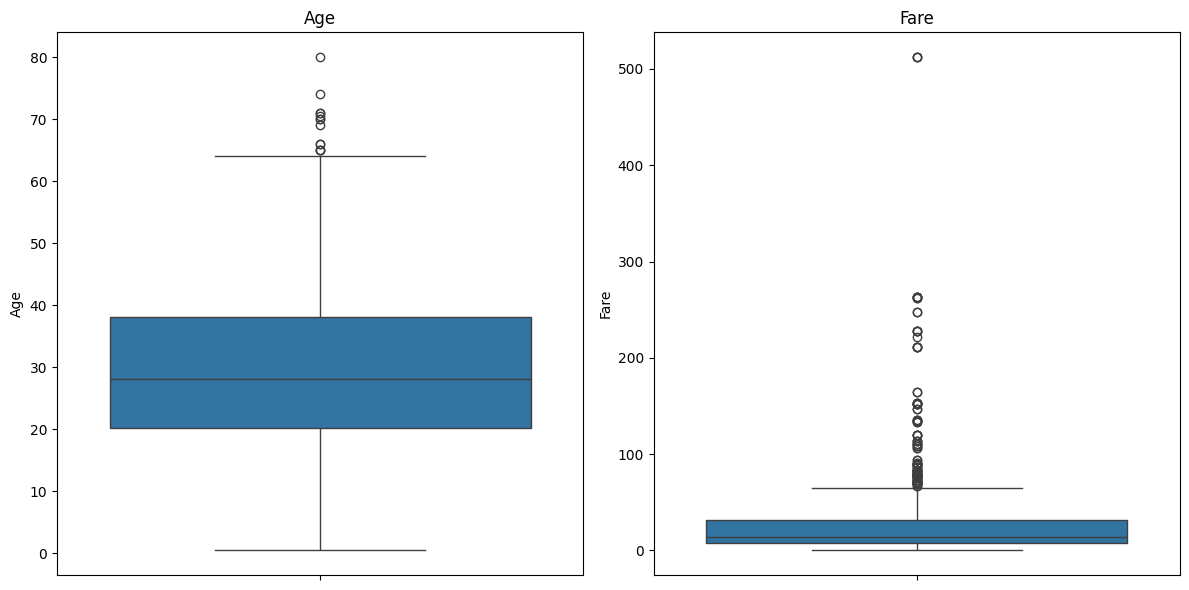

In [72]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=df)
plt.title('Age')

plt.subplot(1, 2, 2)
sns.boxplot(y='Fare', data=df)
plt.title('Fare')

plt.tight_layout()
plt.show()

In [73]:
df['age_zscore'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
df['fare_zscore'] = (df['Fare'] - df['Fare'].mean()) / df['Age'].std()

age_outliers = df[(df['age_zscore'] > 3) | (df['age_zscore'] < -3)]
fare_outliers = df[(df['fare_zscore'] > 3) | (df['fare_zscore'] < -3)]

print("Age outliers:")
print(age_outliers[['Age', 'age_zscore']].head())

print("\nFare outliers:")
print(fare_outliers[['Fare', 'fare_zscore']].head())

Age outliers:
      Age  age_zscore
627  80.0    3.578026
847  74.0    3.153154

Fare outliers:
        Fare  fare_zscore
27  263.0000    16.335935
31  146.5208     8.087815
34   82.1708     3.531065
51   76.7292     3.145735
60   80.0000     3.377347


##  Correct data types
Ensure all columns have the correct data type (string, integer, float, boolean, etc.). You may need to convert some columns using .astype()

In [74]:
print(df.dtypes)

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
age_zscore                 float64
fare_zscore                float64
dtype: object


## Fix inconsistent data
Look for inconsistencies in the data, like spelling variations, different

In [75]:
# I don't have a inconsistent data

# Data Preprocessing


## Renaming columns
Using .rename()

In [76]:
df.rename(columns={'Survived': 'survived', 'Pclass': 'pclass', 'Sex': 'sex', 'Age': 'age', 'SibSp': 'sibsp', 'Parch': 'parch', 'Fare': 'fare', 'Embarked': 'embarked'}, inplace=True)


## Dropping unnecessary columns
 Use .drop() in pandas.

In [78]:
df.drop(['pclass'], axis=1)

,survived,Name,sex,age,Siblings/Spouses Aboard,Parents/Children Aboard,fare,age_zscore,fare_zscore
0,0,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,-0.529068,-1.774223
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0.603924,2.760100
2,1,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,-0.245820,-1.726425
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0.391488,1.472505
4,0,Mr. William Henry Allen,male,35.0,0,0,8.0500,0.391488,-1.717574
...,...,...,...,...,...,...,...,...,...
882,0,Rev. Juozas Montvila,male,27.0,0,0,13.0000,-0.175008,-1.367055
883,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,-0.741503,-0.163251
884,0,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,-1.591247,-0.627070
885,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,-0.245820,-0.163251


## Encoding categorical variables


In [79]:
titanic_encoded = pd.get_dummies(df,drop_first=True)
titanic_encoded

#Encoding categorical variables is a common preprocessing step in machine learning pipelines.
#It involves converting categorical variables into numerical representations that machine learning algorithms can understand.
#One common method for encoding categorical variables is one-hot encoding, which creates binary columns for each category.

,survived,pclass,age,Siblings/Spouses Aboard,Parents/Children Aboard,fare,age_zscore,fare_zscore,Name_Col. John Weir,Name_Col. Oberst Alfons Simonius-Blumer,...,Name_Ms. Encarnacion Reynaldo,Name_Rev. Charles Leonard Kirkland,Name_Rev. Ernest Courtenay Carter,Name_Rev. John Harper,Name_Rev. Juozas Montvila,Name_Rev. Robert James Bateman,Name_Rev. Thomas Roussel Davids Byles,Name_Sir. Cosmo Edmund Duff Gordon,Name_the Countess. of (Lucy Noel Martha Dyer-Edwards) Rothes,sex_male
0,0,3,22.0,1,0,7.2500,-0.529068,-1.774223,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0.603924,2.760100,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,-0.245820,-1.726425,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,0.391488,1.472505,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,0.391488,-1.717574,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,27.0,0,0,13.0000,-0.175008,-1.367055,0,0,...,0,0,0,0,1,0,0,0,0,1
883,1,1,19.0,0,0,30.0000,-0.741503,-0.163251,0,0,...,0,0,0,0,0,0,0,0,0,0
884,0,3,7.0,1,2,23.4500,-1.591247,-0.627070,0,0,...,0,0,0,0,0,0,0,0,0,0
885,1,1,26.0,0,0,30.0000,-0.245820,-0.163251,0,0,...,0,0,0,0,0,0,0,0,0,1


# Data Visualization


##Histograms
Use .hist() in pandas to get a visual representation of the distribution of a numeric variable. This can reveal outliers, skewness, and other patterns.

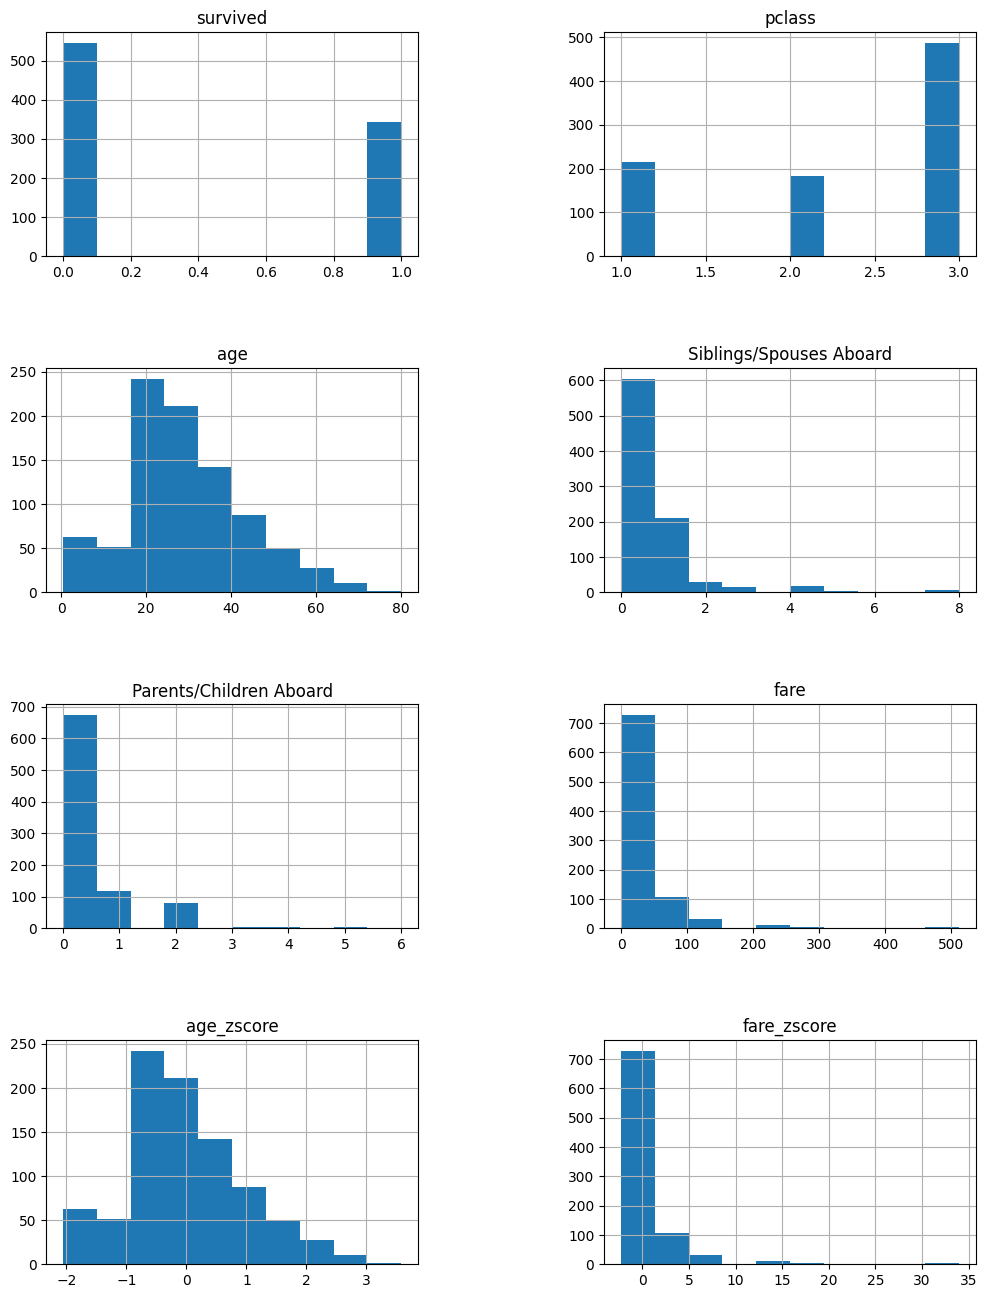

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns for subplots
num_cols = len(numeric_cols)
num_rows = (num_cols - 1) // 2 + 1  # Ensure at least one row

# Create subplots with specified size
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))

# Flatten axes if num_rows == 1
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Plot histograms
for i, col in enumerate(numeric_cols):
    ax = axes[i // 2, i % 2]
    df[col].hist(ax=ax)
    ax.set_title(col)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()


## Box plots
Use .boxplot() in pandas to visualize the distribution through quartiles, extremes, and outliers for a numeric variable.

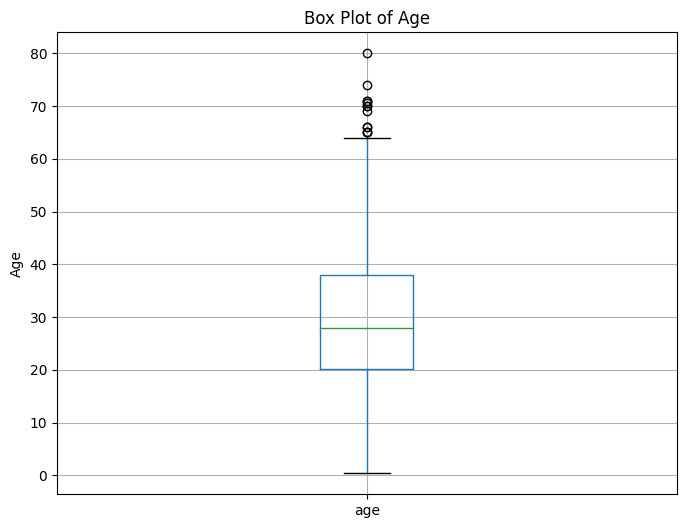

In [86]:
plt.figure(figsize=(8, 6))
df.boxplot(column='age')
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

## Scatter plots
Use .plot(kind=’scatter’) to visualize the relationship between two numeric variables. This can reveal correlations, clusters, and outliers.

<Figure size 800x600 with 0 Axes>

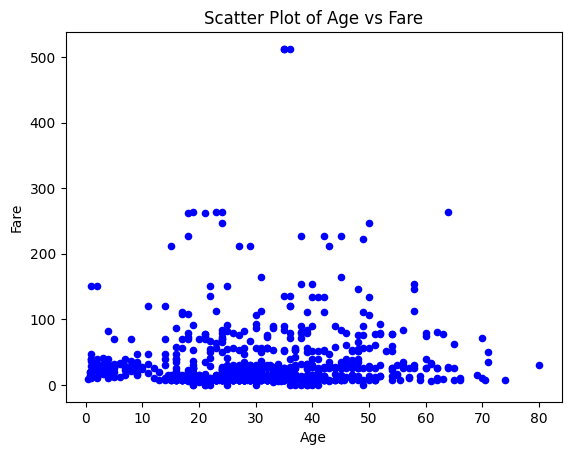

In [85]:
plt.figure(figsize=(8, 6))
df.plot(x='age', y='fare', kind='scatter', color='blue')
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

## Bar plots
Use .plot(kind=’bar’) to compare categorical variables or the counts of categorical variables. This gives a quick visual summary.

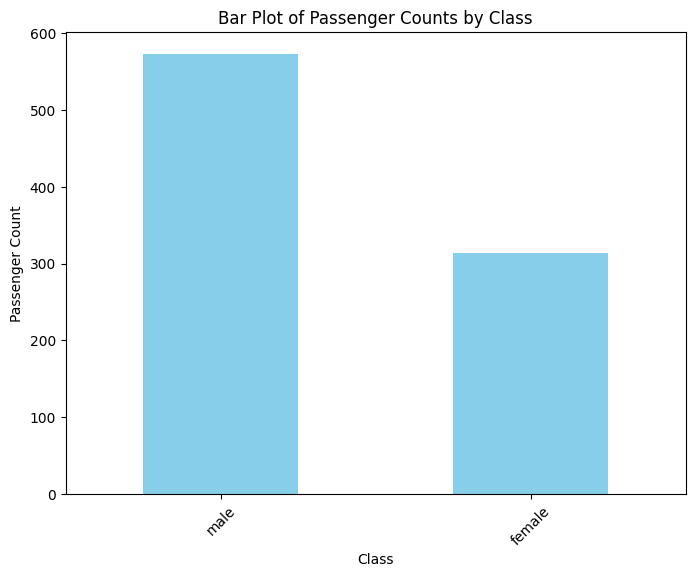

In [84]:
class_counts = df['sex'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Plot of Passenger Counts by Class')
plt.xlabel('Class')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Correlation heatmaps
Use a seaborn heatmap() to visualize the correlation between all numeric variables.

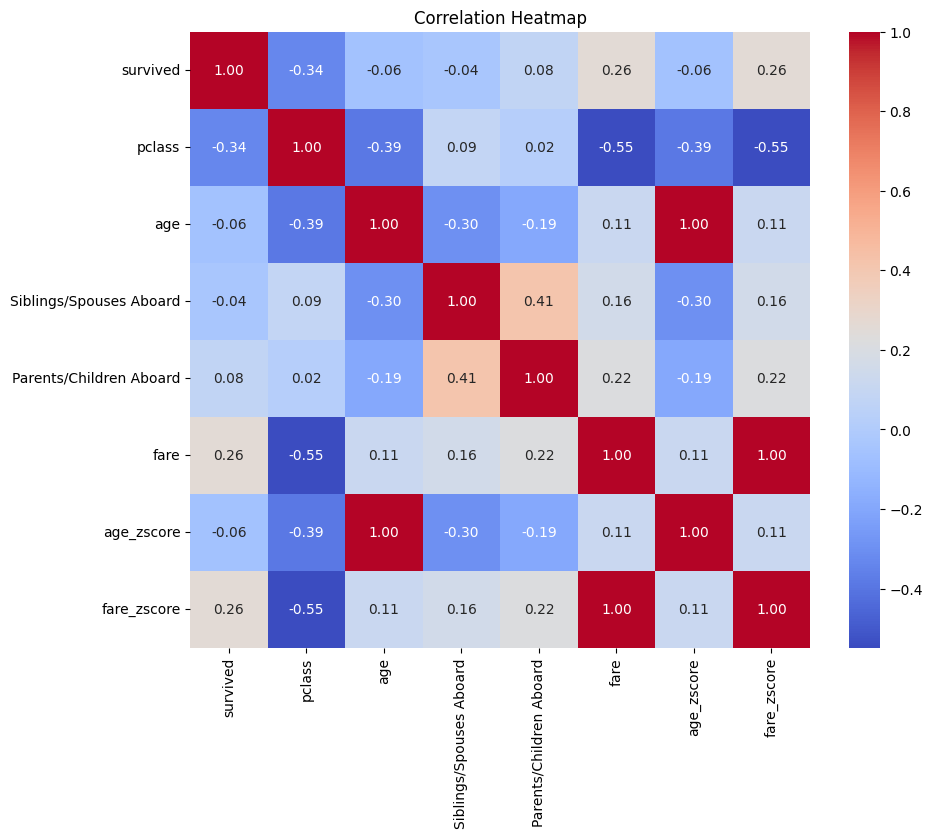

In [82]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()